### Install Libraries

### Import Libraries

In [2]:
import io
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

### Import, Clean, Analyze, & Split Dev Data 


Feature: 2: Driving_to
	Unique Values:
	['No Urgent Place' 'Work' 'Home']
unique vals ['No Urgent Place', 'Work', 'Home']
t_counts [0.6359882005899705, 0.5051916932907349, 0.5028901734104047]
f_counts [0.3640117994100295, 0.4948083067092652, 0.49710982658959535]


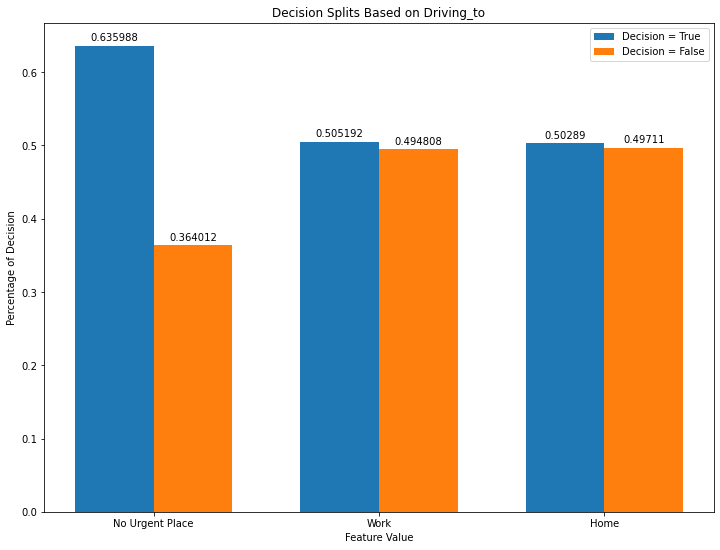


Feature: 3: Passanger
	Unique Values:
	['Partner' 'Alone' 'Kid(s)' 'Friend(s)']
unique vals ['Partner', 'Alone', 'Kid(s)', 'Friend(s)']
t_counts [0.5919540229885057, 0.5255399382927666, 0.5087281795511222, 0.6777445855115758]
f_counts [0.40804597701149425, 0.4744600617072335, 0.4912718204488778, 0.3222554144884242]


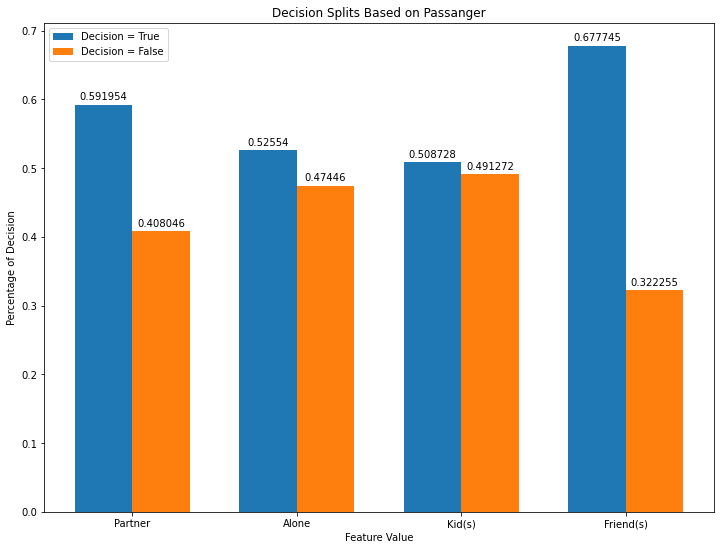


Feature: 2: Weather
	Unique Values:
	['Sunny' 'Rainy' 'Snowy']
unique vals ['Sunny', 'Rainy', 'Snowy']
t_counts [0.599677859001363, 0.46153846153846156, 0.45155555555555554]
f_counts [0.4003221409986371, 0.5384615384615384, 0.5484444444444444]


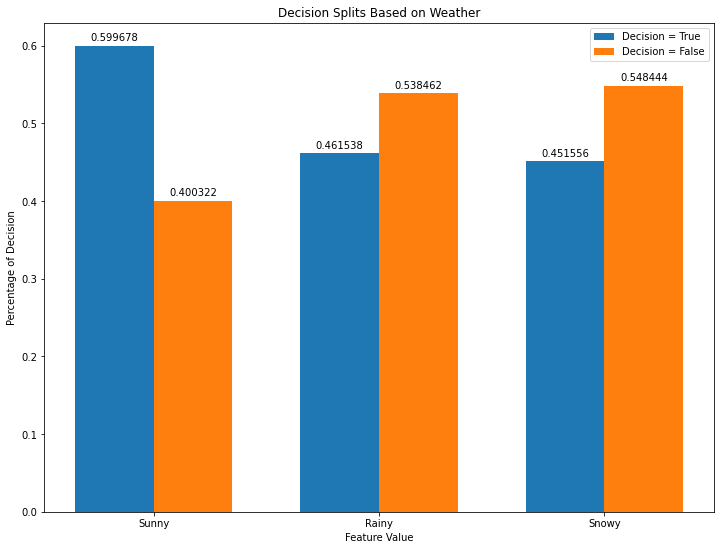


Feature: 2: Temperature
	Unique Values:
	[80 55 30]
unique vals [80, 55, 30]
t_counts [0.6050228310502284, 0.5386614684860299, 0.5221621621621622]
f_counts [0.3949771689497717, 0.4613385315139701, 0.47783783783783784]


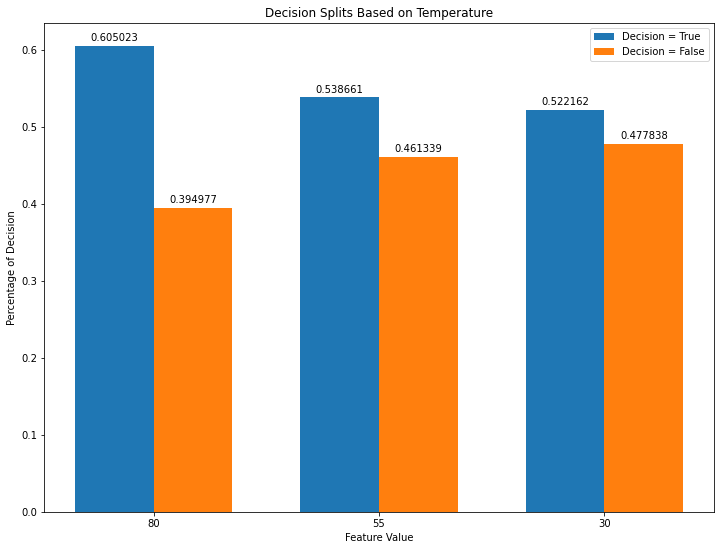


Feature: 4: Time
	Unique Values:
	['6PM' '7AM' '2PM' '10PM' '10AM']
unique vals ['6PM', '7AM', '2PM', '10PM', '10AM']
t_counts [0.5881904761904762, 0.5051916932907349, 0.6727272727272727, 0.5027967681789932, 0.6012965964343598]
f_counts [0.4118095238095238, 0.4948083067092652, 0.32727272727272727, 0.49720323182100684, 0.3987034035656402]


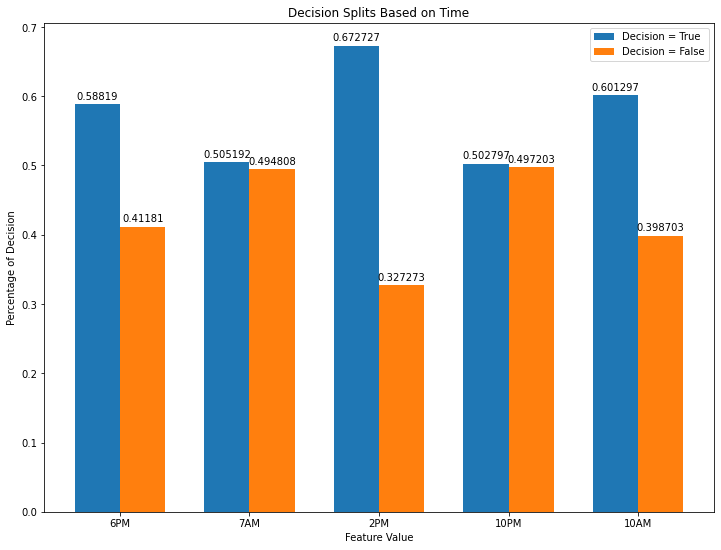


Feature: 4: Coupon
	Unique Values:
	['Bar' 'Restaurant(20-50)' 'Restaurant(<20)' 'Carry out & Take away'
 'Coffee House']
unique vals ['Bar', 'Restaurant(20-50)', 'Restaurant(<20)', 'Carry out & Take away', 'Coffee House']
t_counts [0.40417690417690416, 0.44574290484140233, 0.7050423917893798, 0.7380073800738007, 0.506832298136646]
f_counts [0.5958230958230958, 0.5542570951585977, 0.2949576082106203, 0.26199261992619927, 0.493167701863354]


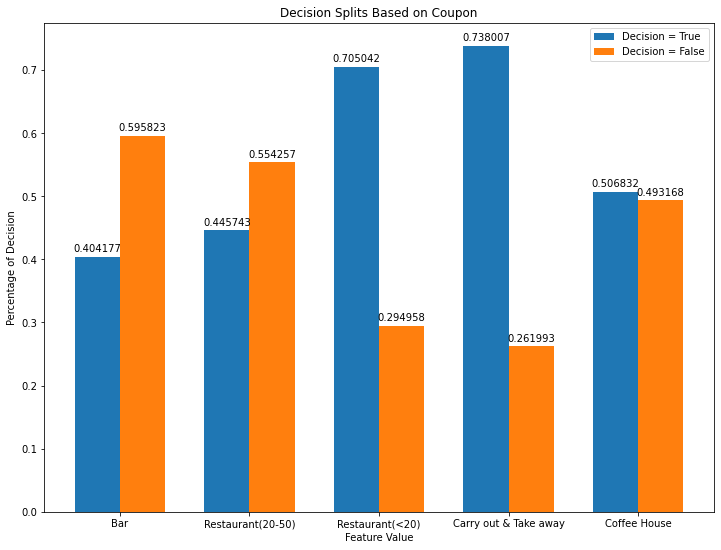


Feature: 1: Coupon_validity
	Unique Values:
	['1d' '2h']
unique vals ['1d', '2h']
t_counts [0.6257289273723272, 0.5001104972375691]
f_counts [0.37427107262767273, 0.49988950276243094]


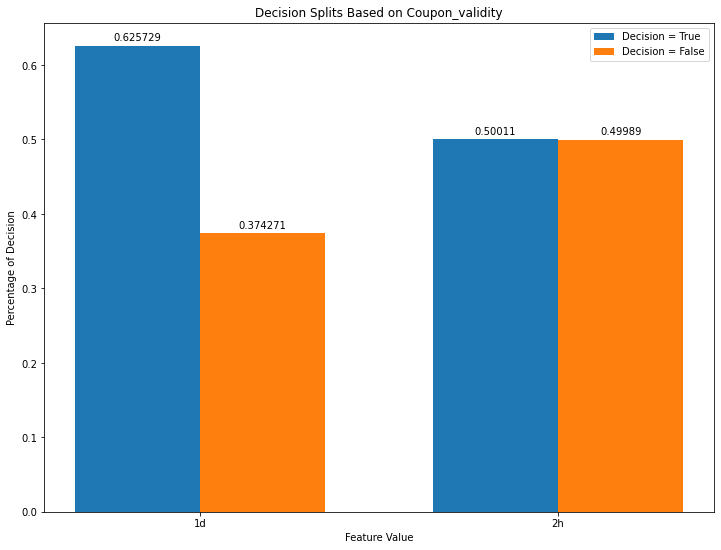


Feature: 1: Gender
	Unique Values:
	['Male' 'Female']
unique vals ['Male', 'Female']
t_counts [0.5908908507223114, 0.5498076923076923]
f_counts [0.4091091492776886, 0.45019230769230767]


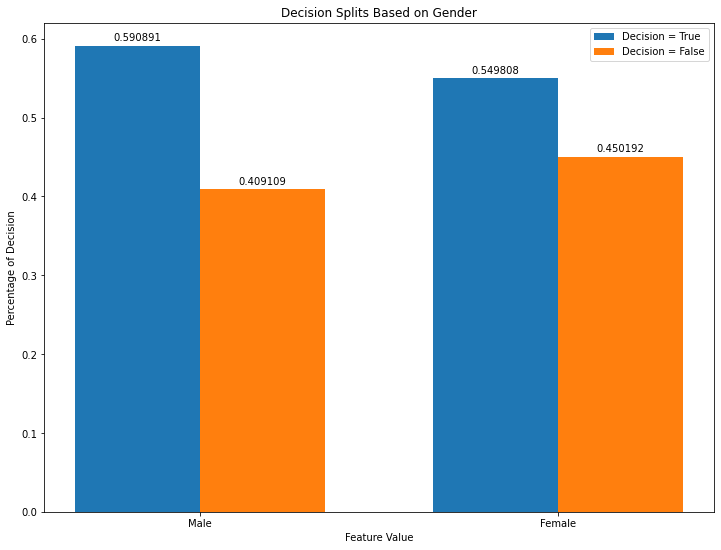


Feature: 7: Age
	Unique Values:
	['31' '26' '50plus' '41' '21' 'below21' '36' '46']
unique vals ['31', '26', '50plus', '41', '21', 'below21', '36', '46']
t_counts [0.5494095711622126, 0.5998013902681232, 0.5065472088215024, 0.5653179190751445, 0.5997191011235955, 0.6289592760180995, 0.5452898550724637, 0.5808170515097691]
f_counts [0.45059042883778744, 0.4001986097318769, 0.4934527911784976, 0.4346820809248555, 0.4002808988764045, 0.37104072398190047, 0.45471014492753625, 0.4191829484902309]


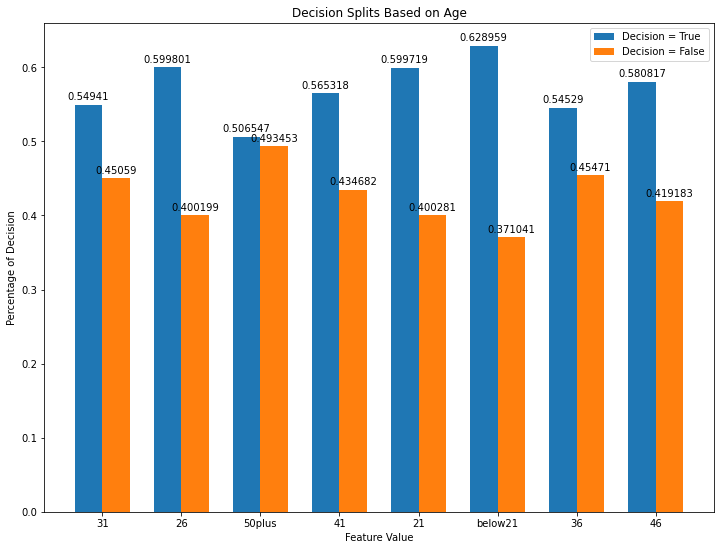


Feature: 4: Maritalstatus
	Unique Values:
	['Married partner' 'Single' 'Unmarried partner' 'Divorced' 'Widowed']
unique vals ['Married partner', 'Single', 'Unmarried partner', 'Divorced', 'Widowed']
t_counts [0.5467312348668281, 0.6033210332103321, 0.5691244239631337, 0.5285714285714286, 0.4519230769230769]
f_counts [0.45326876513317194, 0.3966789667896679, 0.4308755760368664, 0.4714285714285714, 0.5480769230769231]


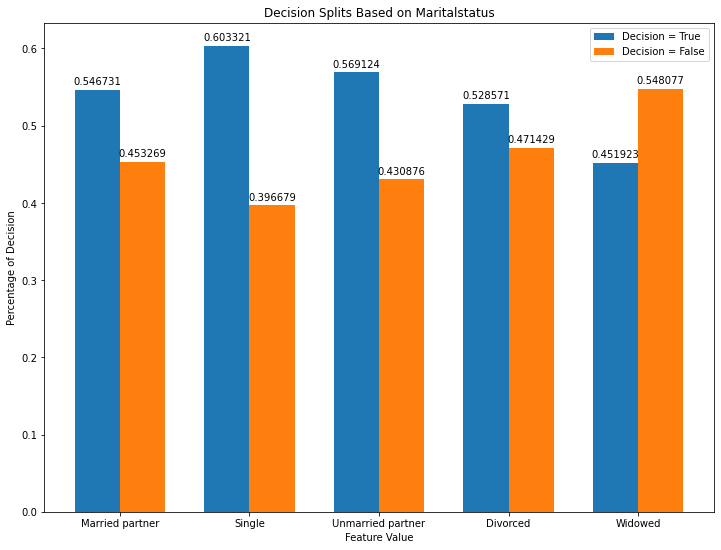


Feature: 1: Children
	Unique Values:
	[0 1]
unique vals [0, 1]
t_counts [0.5912824811399833, 0.53970135103105]
f_counts [0.4087175188600168, 0.46029864896895]


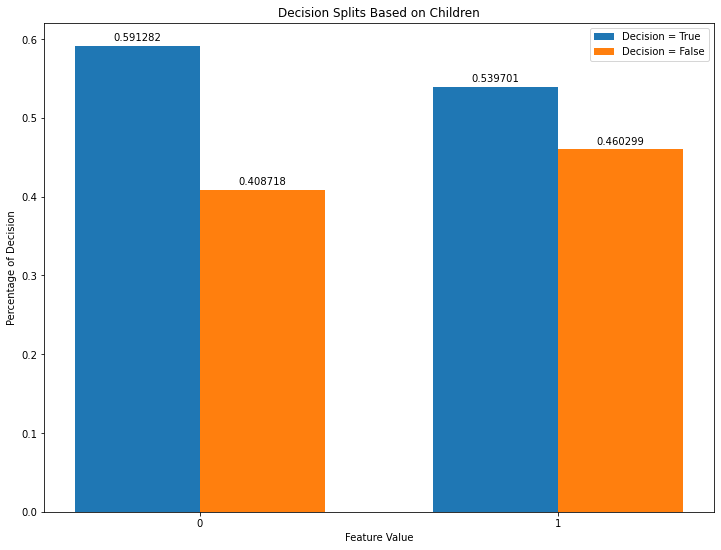


Feature: 5: Education
	Unique Values:
	['Some college - no degree' 'Associates degree' 'Bachelors degree'
 'Graduate degree (Masters or Doctorate)' 'High School Graduate'
 'Some High School']
unique vals ['Some college - no degree', 'Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)', 'High School Graduate', 'Some High School']
t_counts [0.5970361926474779, 0.5556745182012848, 0.5578643578643578, 0.5197853789403085, 0.6041958041958042, 0.7142857142857143]
f_counts [0.4029638073525221, 0.4443254817987152, 0.44213564213564216, 0.4802146210596915, 0.3958041958041958, 0.2857142857142857]


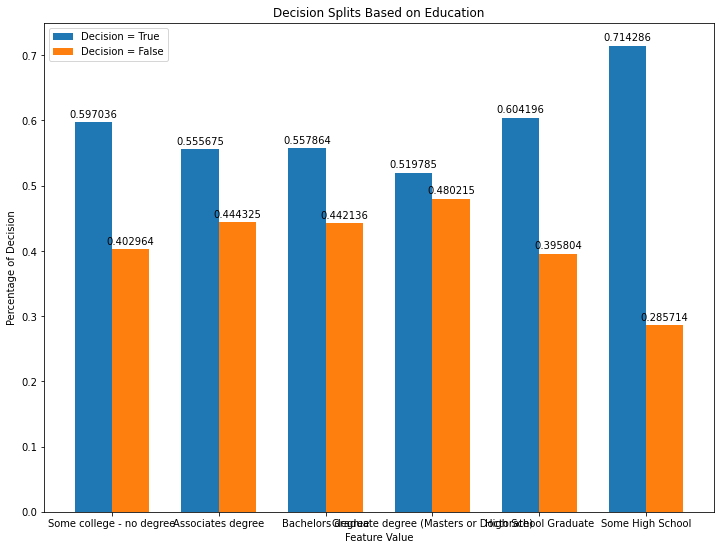


Feature: 24: Occupation
	Unique Values:
	['Construction & Extraction' 'Unemployed'
 'Arts Design Entertainment Sports & Media'
 'Food Preparation & Serving Related' 'Education&Training&Library'
 'Sales & Related' 'Computer & Mathematical' 'Student'
 'Architecture & Engineering' 'Business & Financial'
 'Office & Administrative Support' 'Retired' 'Management'
 'Life Physical Social Science' 'Healthcare Support'
 'Building & Grounds Cleaning & Maintenance' 'Legal'
 'Installation Maintenance & Repair' 'Protective Service'
 'Healthcare Practitioners & Technical' 'Community & Social Services'
 'Transportation & Material Moving' 'Personal Care & Service'
 'Farming Fishing & Forestry' 'Production Occupations']
unique vals ['Construction & Extraction', 'Unemployed', 'Arts Design Entertainment Sports & Media', 'Food Preparation & Serving Related', 'Education&Training&Library', 'Sales & Related', 'Computer & Mathematical', 'Student', 'Architecture & Engineering', 'Business & Financial', 'Office 

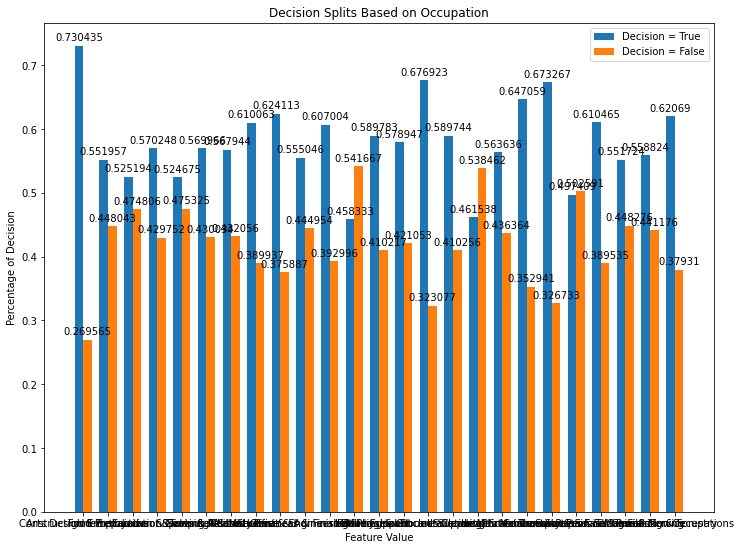


Feature: 8: Income
	Unique Values:
	['$100000 or More' '$62500 - $74999' '$37500 - $49999' '$12500 - $24999'
 '$25000 - $37499' '$75000 - $87499' '$50000 - $62499' '$87500 - $99999'
 'Less than $12500']
unique vals ['$100000 or More', '$62500 - $74999', '$37500 - $49999', '$12500 - $24999', '$25000 - $37499', '$75000 - $87499', '$50000 - $62499', '$87500 - $99999', 'Less than $12500']
t_counts [0.5717344753747323, 0.5412979351032449, 0.5675675675675675, 0.5775116433799069, 0.5982532751091703, 0.4841040462427746, 0.5959970348406227, 0.5312934631432545, 0.5882352941176471]
f_counts [0.4282655246252677, 0.45870206489675514, 0.43243243243243246, 0.42248835662009315, 0.4017467248908297, 0.5158959537572254, 0.40400296515937734, 0.46870653685674546, 0.4117647058823529]


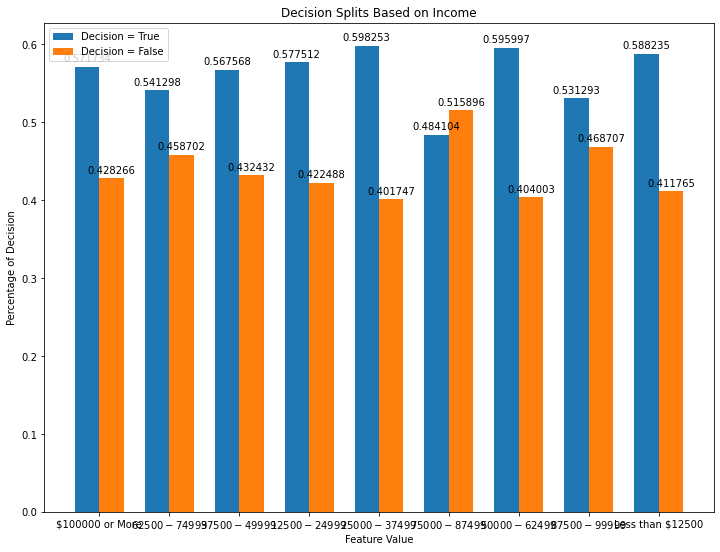


Feature: 5: Bar
	Unique Values:
	[ 2.  0.  1.  3.  4. nan]
unique vals [2.0, 0.0, 1.0, 3.0, 4.0, nan]
t_counts [0.6227937468482098, 0.5301610189858207, 0.5688793718772306, 0.6416184971098265, 0.5857142857142857, 0]
f_counts [0.37720625315179024, 0.46983898101417926, 0.43112062812276947, 0.3583815028901734, 0.4142857142857143, 0]


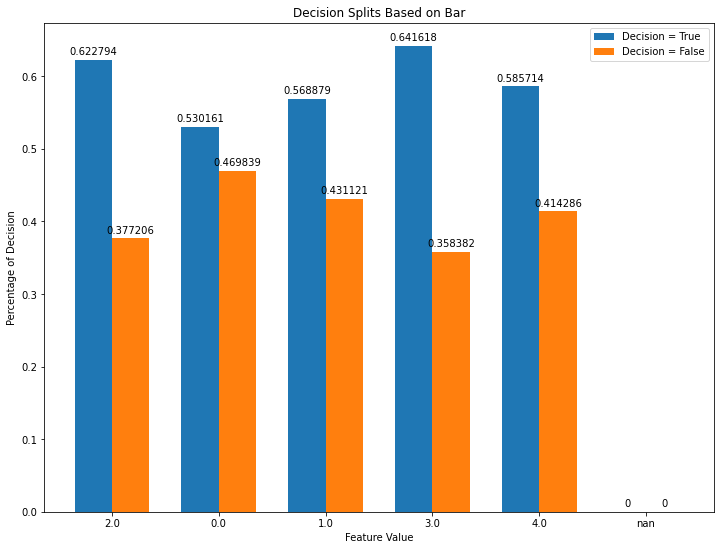


Feature: 5: Coffeehouse
	Unique Values:
	[ 0.  1.  2.  4.  3. nan]
unique vals [0.0, 1.0, 2.0, 4.0, 3.0, nan]
t_counts [0.46847228099873045, 0.5441553682667644, 0.6536979969183359, 0.578708946772367, 0.6352201257861635, 0]
f_counts [0.5315277190012696, 0.45584463173323564, 0.3463020030816641, 0.42129105322763305, 0.36477987421383645, 0]


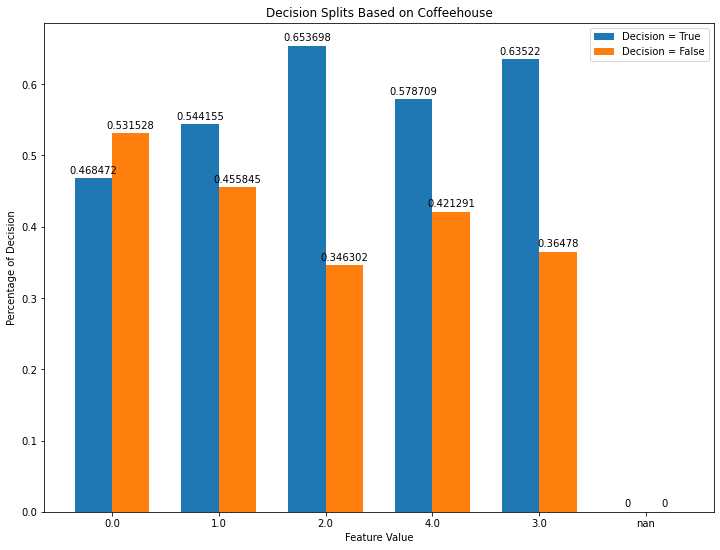


Feature: 5: Carryaway
	Unique Values:
	[ 3.  4.  1.  2. nan  0.]
unique vals [3.0, 4.0, 1.0, 2.0, nan, 0.0]
t_counts [0.5823788546255506, 0.5698500394632992, 0.502301117685733, 0.5837996269650946, 0, 0.5309734513274337]
f_counts [0.41762114537444933, 0.43014996053670085, 0.49769888231426695, 0.4162003730349054, 0, 0.4690265486725664]


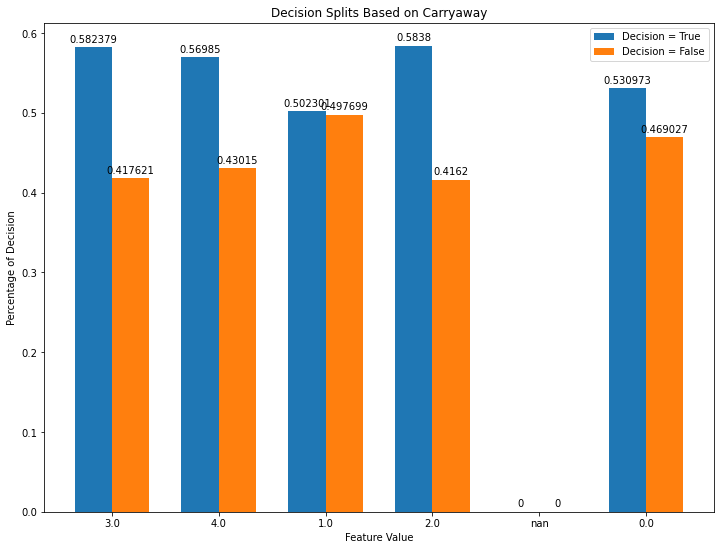


Feature: 5: Restaurantlessthan20
	Unique Values:
	[ 2.  3.  1.  4.  0. nan]
unique vals [2.0, 3.0, 1.0, 4.0, 0.0, nan]
t_counts [0.5644186046511628, 0.5888237323214902, 0.5289256198347108, 0.5960199004975124, 0.56353591160221, 0]
f_counts [0.4355813953488372, 0.41117626767850984, 0.47107438016528924, 0.4039800995024876, 0.43646408839779005, 0]


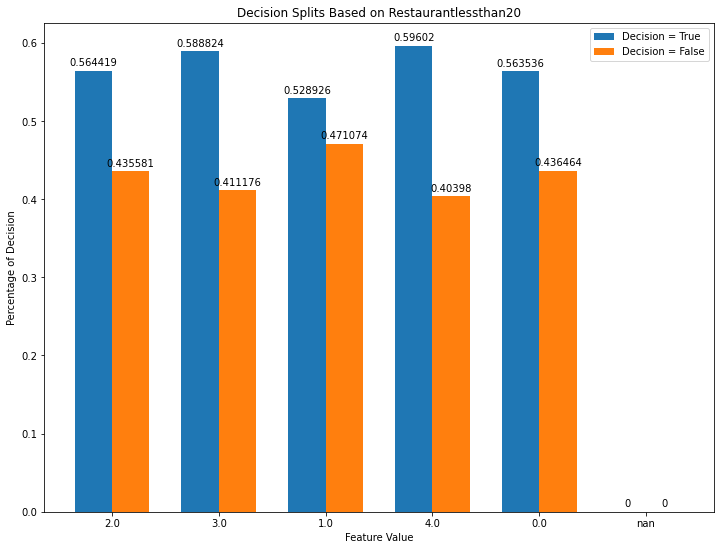


Feature: 5: Restaurant20to50
	Unique Values:
	[ 2.  0.  1. nan  3.  4.]
unique vals [2.0, 0.0, 1.0, nan, 3.0, 4.0]
t_counts [0.6008323874385169, 0.5174418604651163, 0.5576962492313999, 0, 0.6598639455782312, 0.6551724137931034]
f_counts [0.39916761256148314, 0.48255813953488375, 0.4423037507686001, 0, 0.3401360544217687, 0.3448275862068966]


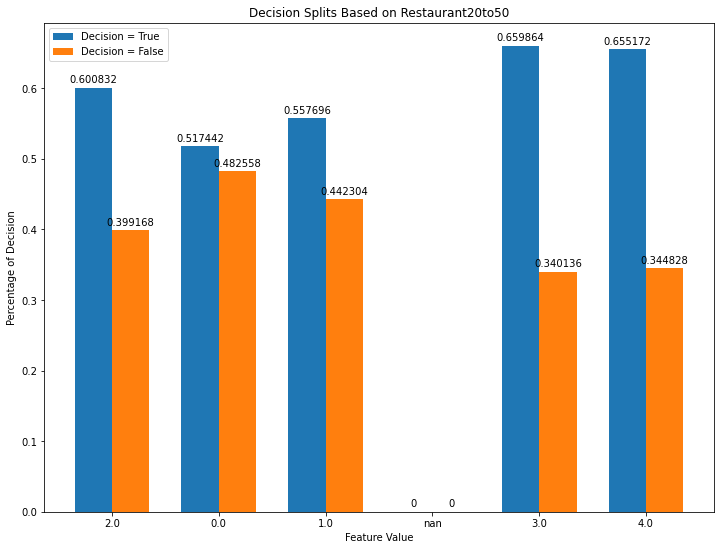


Feature: 1: Direction_same
	Unique Values:
	[0 1]
unique vals [0, 1]
t_counts [0.565596216081653, 0.586046511627907]
f_counts [0.43440378391834705, 0.413953488372093]


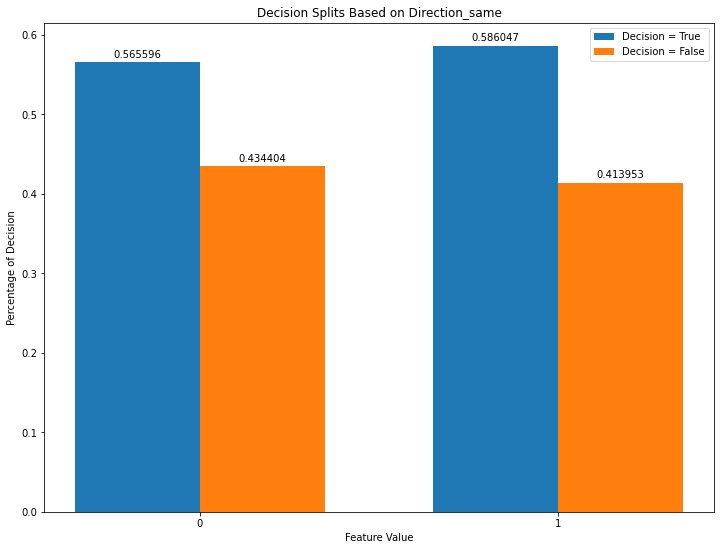


Feature: 2: Distance
	Unique Values:
	[2 1 3]
unique vals [2, 1, 3]
t_counts [0.5637569060773481, 0.617534370069867, 0.4198036006546645]
f_counts [0.4362430939226519, 0.382465629930133, 0.5801963993453355]


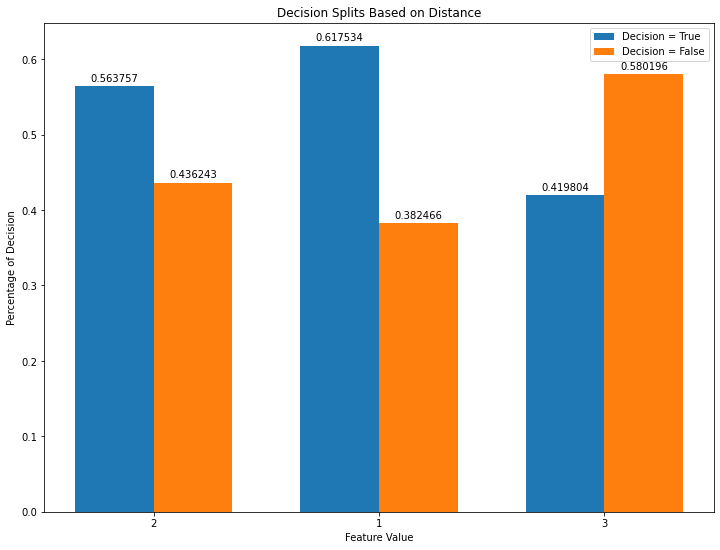

In [8]:

###################################
def plot_results(x_labels,y1,y2,feature_name):

    fig, ax = plt.subplots()
    width=0.35
    x = range(len(x_labels))
    x_spacing = np.arange(len(x_labels))
    c1 = ax.bar(x_spacing - width/2, y1, width, label='Decision = True')
    c2 = ax.bar(x_spacing + width/2, y2, width, label='Decision = False')

    ax.set_ylabel('Percentage of Decision')
    ax.set_xlabel('Feature Value')
    ax.set_title(f'Decision Splits Based on {feature_name}')
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels)
    ax.legend()

    ax.bar_label(c1, padding=3)
    ax.bar_label(c2, padding=3)

    fig.set_size_inches(12, 9)

    plt.show()
    
    
###################################

# --- 1. Import Data ---
dev = pd.read_csv("data/train.csv")

# --- 2. Clean Data ---
# Change decision column to boolean
dev["Decision"] = dev["Decision"].astype('bool')

# --- 3. Analyze Data ---
# Split by decision value
dev_t = dev[dev.Decision==True]
dev_f = dev[dev.Decision==False]

#look at unique values for all features, plot feature values vs decision
for i,feature_name in enumerate(dev):
    if i < 2: continue
    feature = dev[feature_name]
    unique_vals = feature.unique()    
    t_counts = []
    f_counts = []
    tf_ratios = []
    for i,val in enumerate(unique_vals):
        t_count = len(dev_t[dev_t[feature_name] == val])
        f_count = len(dev_f[dev_f[feature_name] == val])
        total_count = t_count+f_count
        t_counts.append(t_count/total_count if total_count > 0 else 0)
        f_counts.append(f_count/total_count if total_count > 0 else 0)
    
    print(f'\nFeature: {i}: {feature_name}\n\tUnique Values:\n\t{unique_vals}') 
    print("unique vals",unique_vals.tolist())
    print('t_counts',t_counts)
    print('f_counts',f_counts)
    plot_results(unique_vals.tolist(),t_counts,f_counts,feature_name)      

# --- 4. Split Data --- 
# Split into test and train sets
test, train = train_test_split(dev, test_size=0.15, random_state=1)


# Models

## Decision Trees

In [ ]:
# TODO: run CART and ID3 and compare results. Use cross validation to tune parameters (See HW1)